## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
%matplotlib inline  
import time

from PIL import Image
import glob

## Load and pre-process data

In [2]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 32
h = 32

# Load data
X =[]
Y =[]

for filename in glob.glob('../Week 04/Borzoi/*.jpg'):
    # Convert each image to greay scale
    im=Image.open(filename).convert('L')
    
    # Resize the images
    im = im.resize((w,h),Image.ANTIALIAS)
    
    #Show each image for the CA
    
    # Convert to numpy array
    arr = np.array(im)
    
    # add images and class to the two lists
    X.append(arr)
    Y.append(1)  # Jack russel class 

# same below
for filename in glob.glob('../Week 04/Maltese/*.jpg'):
    im=Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    arr = np.array(im)
    X.append(arr)
    Y.append(2)  # Ridgeback class

    
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
# in case CPU must be channels last
X = X.reshape(X.shape[0], w, h, 1 ).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

Y = to_categorical(Y)
num_classes = Y.shape[1]

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


## Load and Pre-process data -Batch Processing

In [3]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

w = 32
h = 32

# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        validation_split = 0.2) # we don't expect dogs to be upside-down so we will not flip vertically


# load and iterate training dataset
train_batch_processing = datagen.flow_from_directory('test/', 
                                       target_size=(w, h), 
                                       color_mode='grayscale', 
                                       class_mode='binary', 
                                       batch_size=8,
                                       subset = 'training')
# load and iterate validation dataset
valid_batch_processing = datagen.flow_from_directory('test/', 
                                      target_size=(w, h), 
                                      color_mode='grayscale', 
                                      class_mode='binary', 
                                      batch_size=8,
                                      subset = 'validation')

Found 323 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 41 steps, validate for 10 steps
Epoch 1/10
41/41 [==============================] - 9s 211ms/step - loss: 17.5940 - acc: 0.5449 - val_loss: 2.1742 - val_acc: 0.6875
Epoch 2/10
41/41 [==============================] - 2s 41ms/step - loss: 2.1625 - acc: 0.6347 - val_loss: 2.8338 - val_acc: 0.6250
Epoch 3/10
41/41 [==============================] - 2s 44ms/step - loss: 0.8935 - acc: 0.7152 - val_loss: 0.9227 - val_acc: 0.6500
Epoch 4/10
41/41 [==============================] - 2s 45ms/step - loss: 0.6839 - acc: 0.6811 - val_loss: 0.9410 - val_acc: 0.6500
Epoch 5/10
41/41 [==============================] - 2s 43ms/step - loss: 0.6793 - acc: 0.7028 - val_loss: 0.6727 - val_acc: 0.6625
Epoch 6/10
41/41 [==============================] - 2s 49ms/step - loss: 0.6300 - acc: 0.6471 - val_loss: 0.6464 - val_acc: 0.6625
Epoch 7/10
41/41 [==============================] - 2s 43ms/step - loss: 0.5728 - acc: 0.7214 - val_loss: 0.6449 - val_a

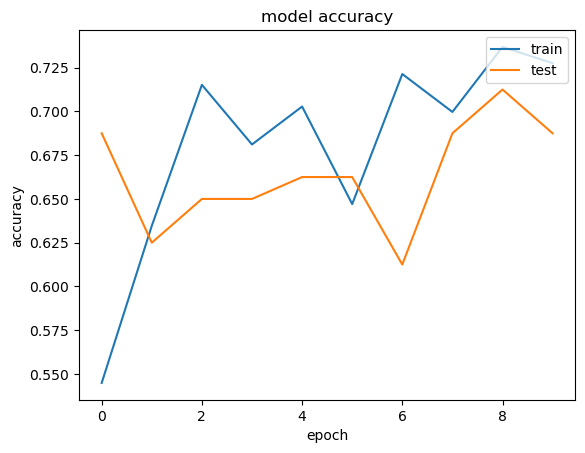

In [4]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h, 1), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(2, activation='softmax'))


modelC.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(train_batch_processing, validation_data=valid_batch_processing, epochs=10, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [5]:
ts = int(time.time())
file_path = f"C:\production\{ts}"
modelC.save(filepath=file_path, save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\production\1688800804\assets


In [1]:
import requests
import json

w = 32
h = 32

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0

url = 'http://localhost:8501/v1/models/img_classifier:predict'
#url = 'http://20.246.185.79:8501/v1/models/img_classifier:predict'

def make_prediction(instances):
    data = json.dumps({"signature_name": "serving_default", "instances": instances.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)["predictions"]
    return predictions


rawImages = []
instances = []


for filename in glob.glob('validate/class0/*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)


for filename in glob.glob('validate/class1/*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)


instances = np.array(instances)
instances = instances.reshape(instances.shape[0],w, h, 1).astype('float32')

predictions = make_prediction(instances)

for i, pred in enumerate(predictions):
    imgplot = plt.imshow(rawImages[i])
    plt.show()
    if np.argmax(pred) == 0:
        print("Maltese")
    else:
        print("Borzoi")

NameError: name 'np' is not defined